## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [30]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

### step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?

In [31]:
data=pd.read_csv("Titanic_train.csv")
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


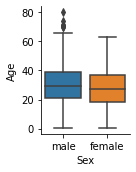

In [32]:
g = sns.catplot("Sex",'Age',
                data=data,
                kind="box", height=2.5, aspect=.8)

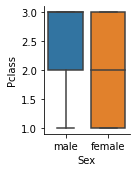

In [33]:
g = sns.catplot("Sex",'Pclass',
                data=data,
                kind="box", height=2.5, aspect=.8)

### step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [34]:
data=data[['Age','Pclass','Sex']] #複製一份資料給 data
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale=0.
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Pclass']=le.fit_transform(data['Pclass'])
display(data)

<ipython-input-34-4c5866481bb6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=le.fit_transform(data['Sex'])
<ipython-input-34-4c5866481bb6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pclass']=le.fit_transform(data['Pclass'])


,Age,Pclass,Sex
0,22.0,2,1
1,38.0,0,0
2,26.0,2,0
3,35.0,0,0
4,35.0,2,1
...,...,...,...
886,27.0,1,1
887,19.0,0,0
888,NaN,2,0
889,26.0,0,1


In [39]:
missing_index=data.isnull()
missing_data=data[missing_index.values==True]
display(missing_data)

,Age,Pclass,Sex
5,NaN,2,1
17,NaN,1,1
19,NaN,2,0
26,NaN,2,1
28,NaN,2,0
...,...,...,...
859,NaN,2,1
863,NaN,2,0
868,NaN,2,1
878,NaN,2,1


In [40]:
# KNN
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(df_filled)

,0,1,2
0,22.0,2.0,1.0
1,38.0,0.0,0.0
2,26.0,2.0,0.0
3,35.0,0.0,0.0
4,35.0,2.0,1.0
...,...,...,...
886,27.0,1.0,1.0
887,19.0,0.0,0.0
888,19.0,2.0,0.0
889,26.0,0.0,1.0
